## Whit Blodgett, Project 1, W205.6
------
### Tools used in this project
##### IPYNB
##### BigQuery, GCP
##### Command Line 
##### Pandas library
##### Seaborn library

In [52]:
import pandas as pd
import seaborn as sbn

# PART I
#### Initial queries
- What's the size of this dataset? (i.e., how many trips)
    '''SELECT COUNT( trip_id )
FROM `bigquery-public-data.san_francisco.bikeshare_trips` '''
    * 983,648 trips
    
    
- What is the earliest start date and time and latest end date and time for a trip?
    '''SELECT min( start_date ), max( end_date )
FROM `bigquery-public-data.san_francisco.bikeshare_trips` '''
    * Earliest start date & time: 2013-08-29 09:08:00 UTC
    * Latest start date & time: 2016-08-31 23:48:00 UTC
    
    
- How many bikes are there?
    '''SELECT COUNT( distinct bike_number ) as total_bikes
FROM `bigquery-public-data.san_francisco.bikeshare_trips` '''
    * 700 bikes total
    
    
#### Questions of your own
- What's the average trip duration (in minutues)?
    '''SELECT AVG(duration_sec)/60 FROM `bigquery-public-data.san_francisco.bikeshare_trips` '''
    * ~17 minutues

- How many stations did they install each year? 
    '''SELECT COUNT(distinct(station_id)) as number_stations_installed, EXTRACT(YEAR FROM installation_date) as year_installed
 FROM `bigquery-public-data.san_francisco.bikeshare_stations` 
 GROUP BY year_installed
'''

    * 64 in 2013
    * 3 in 2014
    * 2 in 2015
    * 5 in 2016

- Which station has the highest average dock availability? Which has the lowest? 
    '''SELECT status.station_id, AVG((docks_available)/dockcount)*100 as average_dock_availabiltiy
FROM `bigquery-public-data.san_francisco.bikeshare_status` as status
JOIN `bigquery-public-data.san_francisco.bikeshare_stations` as stations ON status.station_id=stations.station_id
group by station_id
order by average_dock_availabiltiy'''

    * Station 73 has the lowest number of availble dock space on average, with an average of 40% dockspace available
    
    * Station 73 has the highest number of availble dock space on average, with an average of 40% dockspace available

# PART II
#### Queries

In [14]:
! bq query --use_legacy_sql=FALSE --format=csv 'SELECT COUNT( trip_id ) FROM `bigquery-public-data.san_francisco.bikeshare_trips`'

Waiting on bqjob_r4611e5e446b00e6c_00000174d1bbebc3_1 ... (0s) Current status: DONE   
f0_
983648


In [18]:
! bq query --use_legacy_sql=FALSE --format=csv 'SELECT min( start_date ) as Min, max( end_date ) as Max FROM `bigquery-public-data.san_francisco.bikeshare_trips`'

Waiting on bqjob_r37e26e1603b77ad2_00000174d1c1aa82_1 ... (0s) Current status: DONE   
Min,Max
2013-08-29 09:08:00,2016-08-31 23:48:00


In [17]:
! bq query --use_legacy_sql=FALSE --format=csv 'SELECT COUNT( distinct bike_number ) as total_bikes FROM `bigquery-public-data.san_francisco.bikeshare_trips` '

Waiting on bqjob_r67affb1fe105ca13_00000174d1bd8e42_1 ... (0s) Current status: DONE   
total_bikes
700


### New Queries
 * How many trips are in the morning vs in the afternoon?

In [24]:
! bq query --use_legacy_sql=FALSE --format=csv 'SELECT CASE WHEN (CAST(EXTRACT(HOUR FROM end_date) AS INT64)) > 12 THEN "AM" WHEN (CAST(EXTRACT(HOUR FROM end_date) AS INT64)) <= 12.0 THEN "PM" ELSE Null END AS time_of_day, count(*) FROM `bigquery-public-data.san_francisco.bikeshare_trips` GROUP BY time_of_day'

Waiting on bqjob_r106b714c03129a69_00000174d1f737fa_1 ... (0s) Current status: DONE   
time_of_day,f0_
AM,538637
PM,445011


There were 538,637 trips completed before 12pm.
There were 445,011 trips completed at or following 12pm. 

### Problem Statement 
  * What are the 5 most popular trips that you would call "commuter trips"? 
  
See table below for top 5 trips during commuter hours. Some notes on the analysis here, I assumed commuter trips were anything between 6-10am & 4-7pm. One update I would make if given the time would be to require the pickup station_id to be different from the drop off station_id, as this would also indicate a "commute" ie going from one place to another. Still, one could argue that a commute could be a mother biking her kids to school before returning the bike to the same station...though this would be a stretch!  

In [54]:
pd.set_option('display.max_colwidth', None)
popular_commute_routes = popular_commute_routes.iloc[1:]
popular_commute_routes

,time_of_commute,trip_count
1,San Francisco Caltrain 2 (330 Townsend) to Townsend at 7th,6469
2,Harry Bridges Plaza (Ferry Building) to Embarcadero at Sansome,5917
3,Harry Bridges Plaza (Ferry Building) to 2nd at Townsend,5875
4,2nd at Townsend to Harry Bridges Plaza (Ferry Building),5718
5,Embarcadero at Sansome to Steuart at Market,5463


  * What are your recommendations for offers (justify based on your findings)? See analysis and discussion at bottom of page!

### Project Questions
### 1. What are the most popular routes ranked by trip count?

'''SELECT CONCAT(start_station_name, " to ", end_station_name) as route, count(*) as count
FROM `bigquery-public-data.san_francisco.bikeshare_trips` 
group by route 
ORDER BY count DESC'''

    * The most popular route is from Harry Bridges Plaza (Ferry Building) to Embarcadero at Sansome. See table below for ranking. 

In [34]:
%%bigquery popular_routes
SELECT CONCAT(start_station_name, " to ", end_station_name) as route, count(*) as count
FROM `bigquery-public-data.san_francisco.bikeshare_trips` 
group by route 
ORDER BY count DESC

In [35]:
pd.set_option('display.max_colwidth', None)
popular_routes

,route,count
0,Harry Bridges Plaza (Ferry Building) to Embarcadero at Sansome,9150
1,San Francisco Caltrain 2 (330 Townsend) to Townsend at 7th,8508
2,2nd at Townsend to Harry Bridges Plaza (Ferry Building),7620
3,Harry Bridges Plaza (Ferry Building) to 2nd at Townsend,6888
4,Embarcadero at Sansome to Steuart at Market,6874
...,...,...
2134,Paseo de San Antonio to San Francisco Caltrain (Townsend at 4th),1
2135,Santa Clara at Almaden to San Francisco Caltrain (Townsend at 4th),1
2136,San Antonio Shopping Center to San Francisco Caltrain (Townsend at 4th),1
2137,Mountain View Caltrain Station to San Francisco Caltrain (Townsend at 4th),1


### 2. What's the 5 most popular routes between 6-10am & 4pm-7pm (ie commuter times)?

'''SELECT CASE WHEN (CAST(EXTRACT(HOUR FROM end_date) AS INT64)) BETWEEN 6 AND 10 THEN CONCAT(start_station_name, " to ", end_station_name)
WHEN (CAST(EXTRACT(HOUR FROM end_date) AS INT64)) BETWEEN 16 AND 19 THEN CONCAT(start_station_name, " to ", end_station_name)
ELSE "Off-peak"
END AS time_of_commute, count(*) as trip_count
#CASE WHEN CAST(EXTRACT(HOUR FROM end_date) AS NUMERIC) >12 THEN 'AM' WHEN CAST(EXTRACT(HOUR FROM end_date) AS NUMERIC) <11 THEN 'PM' ELSE NULL
FROM `bigquery-public-data.san_francisco.bikeshare_trips`
GROUP BY time_of_commute
ORDER BY trip_count DESC
LIMIT 6'''

    * See table below

In [47]:
%%bigquery popular_commute_routes
SELECT CASE WHEN (CAST(EXTRACT(HOUR FROM end_date) AS INT64)) BETWEEN 6 AND 10 THEN CONCAT(start_station_name, " to ", end_station_name)
WHEN (CAST(EXTRACT(HOUR FROM end_date) AS INT64)) BETWEEN 16 AND 19 THEN CONCAT(start_station_name, " to ", end_station_name)
ELSE "Off-peak"
END AS time_of_commute, count(*) as trip_count
#CASE WHEN CAST(EXTRACT(HOUR FROM end_date) AS NUMERIC) >12 THEN 'AM' WHEN CAST(EXTRACT(HOUR FROM end_date) AS NUMERIC) <11 THEN 'PM' ELSE NULL
FROM `bigquery-public-data.san_francisco.bikeshare_trips`
GROUP BY time_of_commute
ORDER BY trip_count DESC
LIMIT 6

In [53]:
pd.set_option('display.max_colwidth', None)
popular_commute_routes

,time_of_commute,trip_count
0,Off-peak,278979
1,San Francisco Caltrain 2 (330 Townsend) to Townsend at 7th,6469
2,Harry Bridges Plaza (Ferry Building) to Embarcadero at Sansome,5917
3,Harry Bridges Plaza (Ferry Building) to 2nd at Townsend,5875
4,2nd at Townsend to Harry Bridges Plaza (Ferry Building),5718
5,Embarcadero at Sansome to Steuart at Market,5463


### 3. What's the share breakdown between all the different types of customers?

'''SELECT distinct subscriber_type, COUNT(subscriber_type) as count, CONCAT(ROUND(COUNT(subscriber_type)/983648*100, 2),"%") as share
FROM `bigquery-public-data.san_francisco.bikeshare_trips` 
group by subscriber_type'''

    * See table below

In [55]:
%%bigquery customer_breakdown
SELECT distinct subscriber_type, COUNT(subscriber_type) as count, CONCAT(ROUND(COUNT(subscriber_type)/983648*100, 2),"%") as share
FROM `bigquery-public-data.san_francisco.bikeshare_trips` 
group by subscriber_type

In [56]:
pd.set_option('display.max_colwidth', None)
customer_breakdown

,subscriber_type,count,share
0,Customer,136809,13.91%
1,Subscriber,846839,86.09%


### 4. What's the average monthly trip count for a year over all the years of data (ie what's the seasonal behavior of customers)?

'''SELECT trip_id, end_date, subscriber_type, start_station_id, end_station_id, (CAST(EXTRACT(HOUR FROM end_date) AS INT64)) as hour, (CAST(EXTRACT(MONTH FROM end_date) AS INT64)) as month, (CAST(EXTRACT(YEAR FROM end_date) AS INT64)) as year
FROM `bigquery-public-data.san_francisco.bikeshare_trips` '''

    * See graph below

In [ ]:
%%bigquery trips_overview
SELECT trip_id, end_date, subscriber_type, start_station_id, end_station_id, (CAST(EXTRACT(HOUR FROM end_date) AS INT64)) as hour, (CAST(EXTRACT(MONTH FROM end_date) AS INT64)) as month, (CAST(EXTRACT(YEAR FROM end_date) AS INT64)) as year
FROM `bigquery-public-data.san_francisco.bikeshare_trips` 



In [61]:
trips_overview

,trip_id,end_date,subscriber_type,start_station_id,end_station_id,hour,month,year
0,944732,2015-09-24 18:06:00+00:00,Customer,83,83,18,9,2015
1,984595,2015-10-25 19:51:00+00:00,Customer,83,83,19,10,2015
2,984596,2015-10-25 19:51:00+00:00,Customer,83,83,19,10,2015
3,1129385,2016-03-18 12:14:00+00:00,Customer,83,83,12,3,2016
4,1030383,2015-12-06 12:28:00+00:00,Customer,83,83,12,12,2015
...,...,...,...,...,...,...,...,...
983643,224005,2014-03-22 22:00:00+00:00,Customer,68,68,22,3,2014
983644,1292797,2016-07-27 18:00:00+00:00,Customer,68,68,18,7,2016
983645,246039,2014-04-12 14:48:00+00:00,Customer,68,68,14,4,2014
983646,138370,2013-12-30 17:07:00+00:00,Customer,68,68,17,12,2013


In [4]:
trips_overview = trips_overview.loc[:, ['month','trip_id']]
trips_overview = trips_overview.groupby('month').count()

In [13]:
trips_overview.reset_index(inplace=True)

[Text(0.5, 1.0, 'Average rides per month, 2013-2016'),
 Text(0, 0.5, 'Trip Count'),
 Text(0.5, 0, 'Month')]

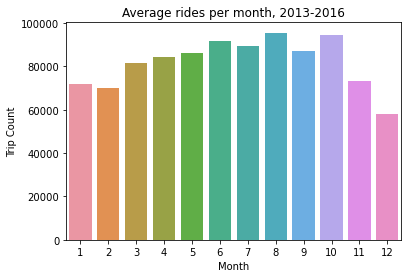

In [55]:
ax = sbn.barplot(x="month",y="trip_id",data=trips_overview)
ax.set(title="Average rides per month, 2013-2016", ylabel="Trip Count", xlabel="Month")

### 5. On average, over a day is there any noticable difference in the behavior between subscribers and one-off customers?

'''SELECT trip_id, end_date, subscriber_type,(CAST(EXTRACT(HOUR FROM end_date) AS INT64)) as hour, ROUND(duration_sec/60,2) as duration_mins
FROM `bigquery-public-data.san_francisco.bikeshare_trips` '''

* One-off customers have a much higher average trip duration 
* The variance in trip behavior throughout a day is different between the two. 

In [31]:
%%bigquery trips_duration
SELECT trip_id, end_date, subscriber_type,(CAST(EXTRACT(HOUR FROM end_date) AS INT64)) as hour, ROUND(duration_sec/60,2) as duration_mins
FROM `bigquery-public-data.san_francisco.bikeshare_trips` 

[Text(0.5, 1.0, 'Average trip duration by customer type'),
 Text(0, 0.5, 'Trip Duration (mins)'),
 Text(0.5, 0, 'Hour')]

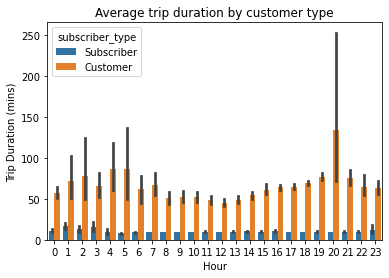

In [64]:
trips_duration
ax2 = sbn.barplot(x="hour",y="duration_mins",hue="subscriber_type",data=trips_duration)
ax2.set(title="Average trip duration by customer type", ylabel="Trip Duration (mins)", xlabel="Hour")
# ax2.set_yscale("log")

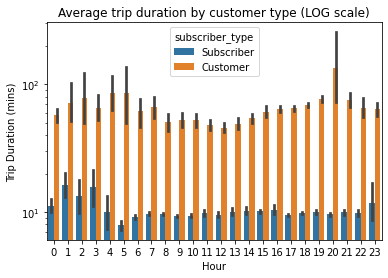

In [65]:
trips_duration
ax2 = sbn.barplot(x="hour",y="duration_mins",hue="subscriber_type",data=trips_duration)
ax2.set(title="Average trip duration by customer type (LOG scale)", ylabel="Trip Duration (mins)", xlabel="Hour")
ax2.set_yscale("log")

## Recommendation:
To increase ridership, my recommendation is the following: 
Lyft is missing a huge opertunity to rent bikes to tourists visiting the city. One-off customer business is quite low (\~14% of total) and represents a huge oppertunity for growth. Tourists visiting the city are unlikely to have normal means to get around and are prime targets for one-off business. Lyft could offer all riders from SFO into a location with a Dock a voucher for discounted rides. This could be 5 minutues of free time - since we know the average trip length for one-off customers is considerably longer than a subscriber (\~60 mins).